<a href="https://colab.research.google.com/github/danishgawai/ML-dataset/blob/master/iris_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
iris = pd.read_csv(url, names=names)
                 

In [3]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


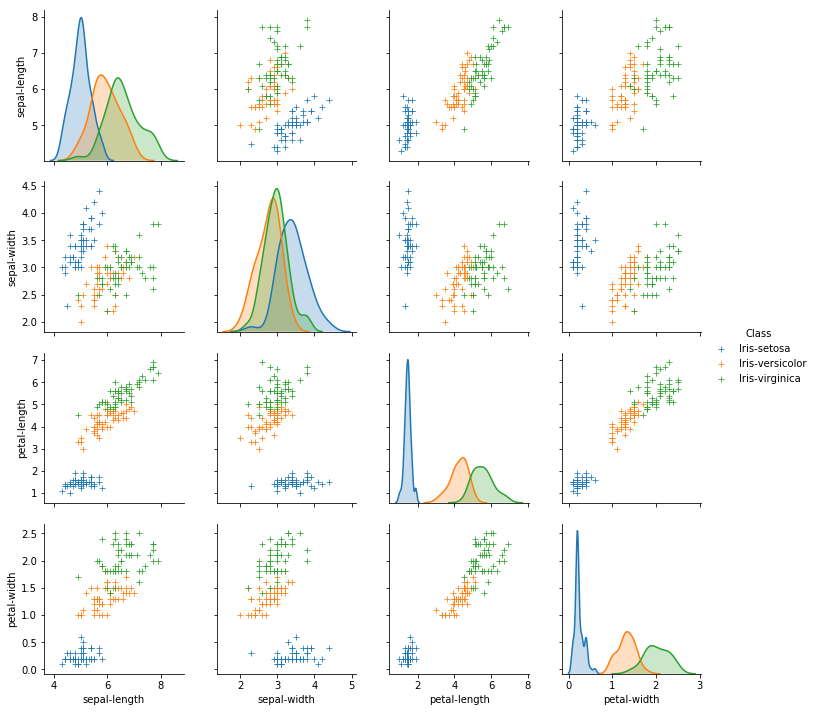

In [4]:
sns.pairplot(iris,hue= 'Class', markers='+')

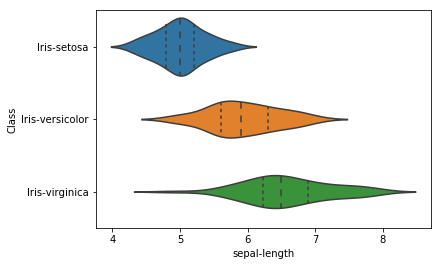

In [5]:
g = sns.violinplot(y='Class', x='sepal-length', data=iris, inner='quartile',)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
iris[:,3] = lab.fit_transform(iris[:,3])

TypeError: ignored

In [8]:
X = iris.iloc[:,:-1]
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = iris.iloc[:,4]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.60, stratify = y,random_state= 77 )

In [13]:
y_train

array([0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       0, 2])

In [14]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
knn.fit(X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [19]:
pred = knn.predict(X_test)
print (pred)
print (knn.score(X_test, y_test))

[2 0 0 0 2 2 2 1 1 0 1 2 2 1 2 0 1 2 2 1 0 0 1 0 1 0 1 0 0 1 0 2 1 0 1 2 2
 0 2 2 2 2 2 0 1 0 2 0 1 1 2 0 2 1 1 0 1 1 1 0]
0.9666666666666667


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



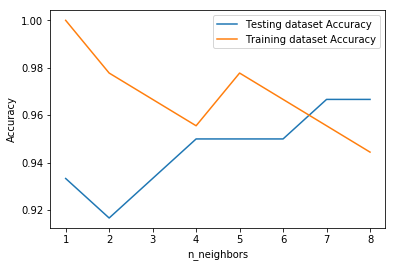

In [21]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
  
  
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
      
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 